# Import Librariers

In [145]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.ticker as mtick 
%matplotlib inline

In [241]:
telco = pd.read_csv("dataset1.csv")

In [147]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [148]:
### Checking Data Shape
telco.shape

(7043, 21)

In [149]:
### Checking Columns
telco.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [150]:
### Data Types of Objects
telco.dtypes
### 

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [151]:
### Statistics of numeric variables
telco.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [152]:
#OBSERVATIONS:
# 1. SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not proper.
# 2. 75% customers have tenure less than 55 months.
# 3. Average Monthly Charges are USD 64.76 whereas 25% pay more than USD 89.85 per month.

In [153]:
#Check for the counts of Churn
telco['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

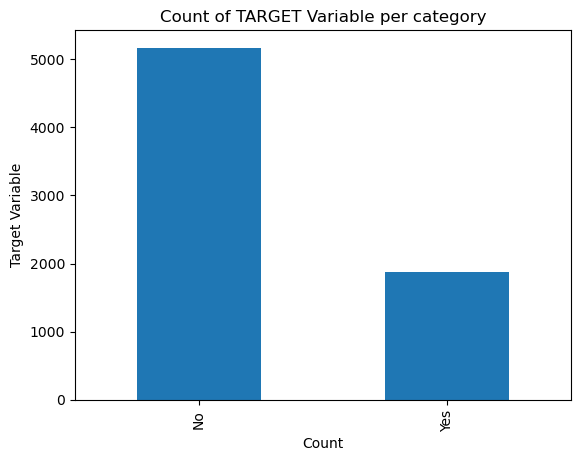

In [154]:
# Displaying Churn through bar plot
telco['Churn'].value_counts().plot(kind='bar')
plt.xlabel("Count")
plt.ylabel("Target Variable")
plt.title("Count of TARGET Variable per category");

In [155]:
### Data seems to be highly imbalanced

In [156]:
telco.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [157]:
telco.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [242]:
#drop column customerID and tenure
telco.drop(columns= ['customerID'], axis=1, inplace=True)

In [243]:
telco.shape

(7043, 20)

In [160]:
telco.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [161]:
telco.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

###### Dependent & Independent Features

In [162]:
X= telco.iloc[:,0:-1].values

In [163]:
X

array([['Female', 0, 'Yes', ..., 'Electronic check', 29.85, '29.85'],
       ['Male', 0, 'No', ..., 'Mailed check', 56.95, '1889.5'],
       ['Male', 0, 'No', ..., 'Mailed check', 53.85, '108.15'],
       ...,
       ['Female', 0, 'Yes', ..., 'Electronic check', 29.6, '346.45'],
       ['Male', 1, 'Yes', ..., 'Mailed check', 74.4, '306.6'],
       ['Male', 0, 'No', ..., 'Bank transfer (automatic)', 105.65,
        '6844.5']], dtype=object)

In [164]:
Y= telco['Churn'].values

In [165]:
Y

array(['No', 'No', 'Yes', ..., 'No', 'Yes', 'No'], dtype=object)

# Univariate Analysis

###### Handling Outliers

In [166]:
# Handling Outliers
telco.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


<Axes: ylabel='MonthlyCharges'>

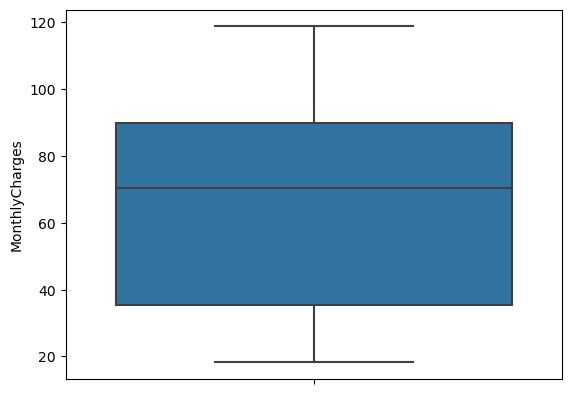

In [167]:
sns.boxplot(y='MonthlyCharges', data=telco )

In [244]:
indexes=telco[telco['TotalCharges']==' '].index

In [245]:
# dropping rowa where totalcharges are ' '
telco.drop(indexes,inplace=True)

In [246]:
telco.reset_index(inplace=True)

In [247]:
# converting totalcharges from object to float
telco['TotalCharges']=telco['TotalCharges'].astype('float64')

<Axes: xlabel='TotalCharges'>

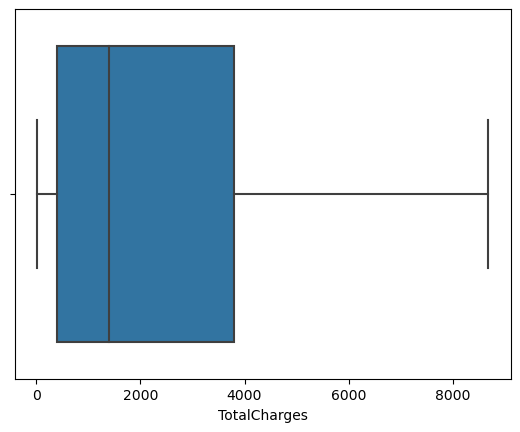

In [248]:
sns.boxplot(x='TotalCharges', data=telco )

In [196]:
###No outliers detected in Monthly Charges & Total Charges

###### Countplot

<Axes: xlabel='PhoneService', ylabel='count'>

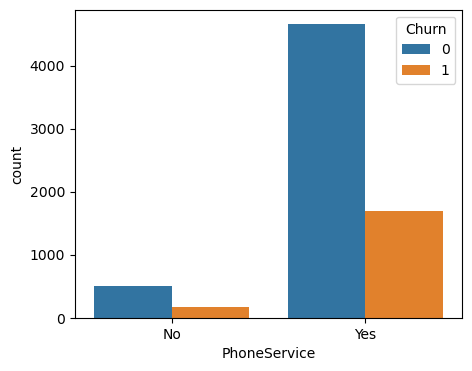

In [197]:
fig,ax = plt.subplots(figsize=(5,4))
sns.countplot(ax=ax,data=telco, x='PhoneService', hue='Churn')

<Axes: xlabel='InternetService', ylabel='count'>

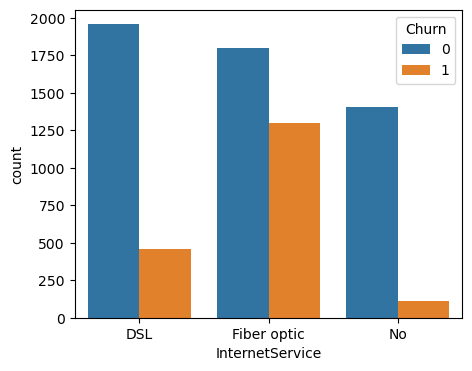

In [198]:
fig,ax = plt.subplots(figsize=(5,4))
sns.countplot(ax=ax,data=telco, x='InternetService', hue='Churn')

<Axes: xlabel='Contract', ylabel='count'>

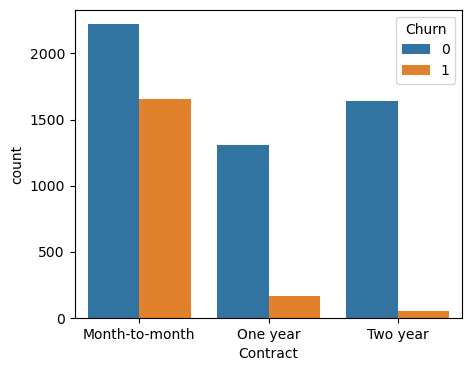

In [199]:
fig,ax = plt.subplots(figsize=(5,4))
sns.countplot(ax=ax,data=telco, x='Contract', hue='Churn')

<Axes: xlabel='PaymentMethod', ylabel='count'>

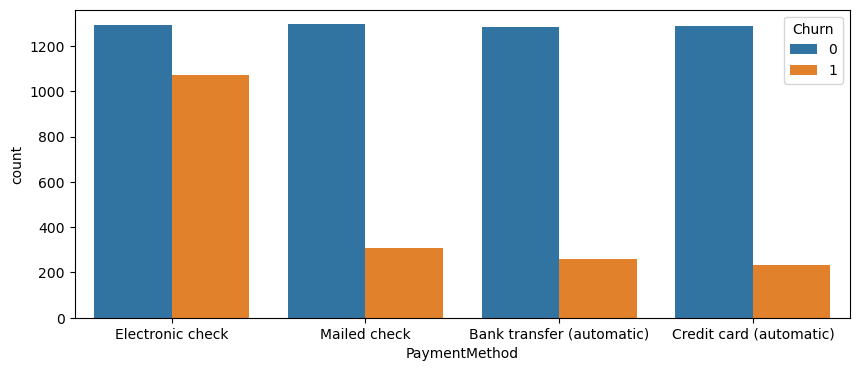

In [200]:
fig,ax = plt.subplots(figsize=(10,4))
sns.countplot(ax=ax,data=telco, x='PaymentMethod', hue='Churn')

###### Scatterplot

In [249]:
telco['Churn'] = np.where(telco.Churn == 'Yes',1,0)

In [250]:
telco.drop('index',axis=1,inplace=True)

In [251]:
telco.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [252]:
tmp=telco.drop(['tenure','TotalCharges','MonthlyCharges'],axis=1)
tmp

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,1
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,0
7028,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),0
7029,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,0
7030,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1


In [253]:
telco_dummies=pd.get_dummies(tmp)
telco_dummies

,SeniorCitizen,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,0,0,1,1,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,1,0,1,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,0,0,1,1,0,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,1,1,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,0,1,0,1,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1
7028,0,0,1,0,0,1,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
7029,0,0,1,0,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
7030,1,1,0,1,0,1,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1


In [254]:
telco_dummies['tenure']=telco['tenure']
telco_dummies['MonthlyCharges']=telco['MonthlyCharges']
telco_dummies['TotalCharges']=telco['TotalCharges']

In [255]:
telco_dummies

,SeniorCitizen,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,1,0,1,0,...,0,0,1,0,0,1,0,1,29.85,29.85
1,0,0,0,1,1,0,1,0,0,1,...,0,1,0,0,0,0,1,34,56.95,1889.50
2,0,1,0,1,1,0,1,0,0,1,...,0,0,1,0,0,0,1,2,53.85,108.15
3,0,0,0,1,1,0,1,0,1,0,...,0,1,0,1,0,0,0,45,42.30,1840.75
4,0,1,1,0,1,0,1,0,0,1,...,0,0,1,0,0,1,0,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,0,1,0,1,0,1,0,1,...,0,0,1,0,0,0,1,24,84.80,1990.50
7028,0,0,1,0,0,1,0,1,0,1,...,0,0,1,0,1,0,0,72,103.20,7362.90
7029,0,0,1,0,0,1,0,1,1,0,...,0,0,1,0,0,1,0,11,29.60,346.45
7030,1,1,0,1,0,1,1,0,0,1,...,0,0,1,0,0,0,1,4,74.40,306.60


###### Skewed Features

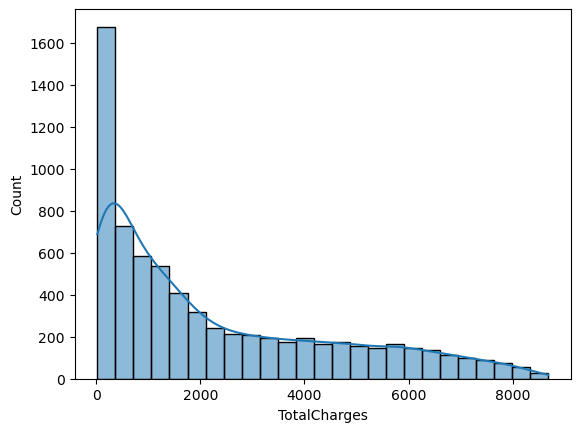

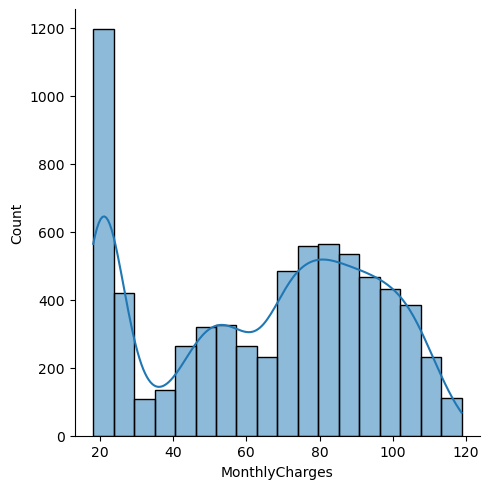

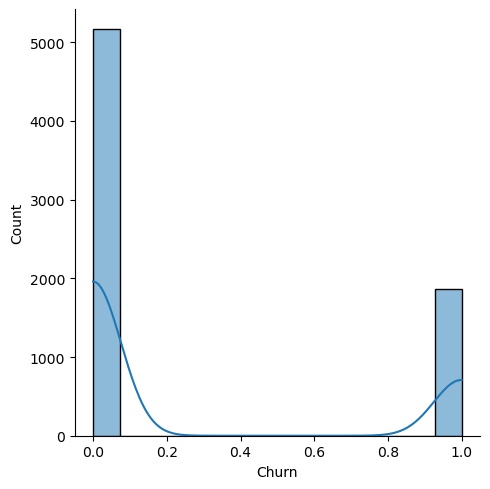

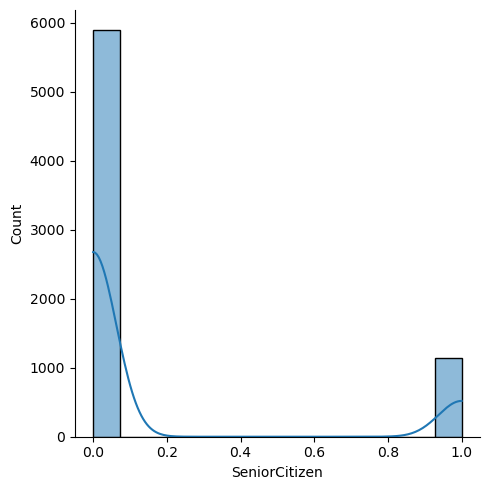

In [260]:
sns.histplot(x='TotalCharges', data= telco,kde=1 )
sns.displot(x='MonthlyCharges', data= telco ,kde=1)
sns.displot(x='Churn', data= telco ,kde=1)
sns.displot(x='SeniorCitizen', data= telco,kde=1 )

# Feature engineering

###### Scaling

In [263]:
from sklearn.preprocessing import StandardScaler

In [266]:
X=telco_dummies.drop(['Churn'],axis=1)
X

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,1,1,0,1,0,0,...,0,0,1,0,0,1,0,1,29.85,29.85
1,0,0,1,1,0,1,0,0,1,1,...,0,1,0,0,0,0,1,34,56.95,1889.50
2,0,0,1,1,0,1,0,0,1,1,...,0,0,1,0,0,0,1,2,53.85,108.15
3,0,0,1,1,0,1,0,1,0,0,...,0,1,0,1,0,0,0,45,42.30,1840.75
4,0,1,0,1,0,1,0,0,1,1,...,0,0,1,0,0,1,0,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,1,0,1,0,1,0,1,0,...,0,0,1,0,0,0,1,24,84.80,1990.50
7028,0,1,0,0,1,0,1,0,1,0,...,0,0,1,0,1,0,0,72,103.20,7362.90
7029,0,1,0,0,1,0,1,1,0,0,...,0,0,1,0,0,1,0,11,29.60,346.45
7030,1,0,1,0,1,1,0,0,1,0,...,0,0,1,0,0,0,1,4,74.40,306.60


In [288]:
y=telco_dummies['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int32

In [270]:
list=['tenure','MonthlyCharges','TotalCharges']

In [272]:
x=X[list]
x

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7027,24,84.80,1990.50
7028,72,103.20,7362.90
7029,11,29.60,346.45
7030,4,74.40,306.60


In [277]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-1.28024804, -1.16169394, -0.99419409],
       [ 0.06430269, -0.26087792, -0.17373982],
       [-1.23950408, -0.36392329, -0.95964911],
       ...,
       [-0.87280842, -1.17000405, -0.85451414],
       [-1.15801615,  0.31916782, -0.87209546],
       [ 1.36810945,  1.35793167,  2.01234407]])

In [279]:
x_scaled_df=pd.DataFrame(x_scaled,columns=list)
x_scaled_df

,tenure,MonthlyCharges,TotalCharges
0,-1.280248,-1.161694,-0.994194
1,0.064303,-0.260878,-0.173740
2,-1.239504,-0.363923,-0.959649
3,0.512486,-0.747850,-0.195248
4,-1.239504,0.196178,-0.940457
...,...,...,...
7027,-0.343137,0.664868,-0.129180
7028,1.612573,1.276493,2.241056
7029,-0.872808,-1.170004,-0.854514
7030,-1.158016,0.319168,-0.872095


In [280]:
X.update(x_scaled_df[list])

In [281]:
X

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,1,1,0,1,0,0,...,0,0,1,0,0,1,0,-1.280248,-1.161694,-0.994194
1,0,0,1,1,0,1,0,0,1,1,...,0,1,0,0,0,0,1,0.064303,-0.260878,-0.173740
2,0,0,1,1,0,1,0,0,1,1,...,0,0,1,0,0,0,1,-1.239504,-0.363923,-0.959649
3,0,0,1,1,0,1,0,1,0,0,...,0,1,0,1,0,0,0,0.512486,-0.747850,-0.195248
4,0,1,0,1,0,1,0,0,1,1,...,0,0,1,0,0,1,0,-1.239504,0.196178,-0.940457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,1,0,1,0,1,0,1,0,...,0,0,1,0,0,0,1,-0.343137,0.664868,-0.129180
7028,0,1,0,0,1,0,1,0,1,0,...,0,0,1,0,1,0,0,1.612573,1.276493,2.241056
7029,0,1,0,0,1,0,1,1,0,0,...,0,0,1,0,0,1,0,-0.872808,-1.170004,-0.854514
7030,1,0,1,0,1,1,0,0,1,0,...,0,0,1,0,0,0,1,-1.158016,0.319168,-0.872095


## Model Building

In [284]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [290]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=101)

In [291]:
y_train

850     0
2122    1
596     0
206     0
5006    0
       ..
599     0
5695    0
1361    1
1547    0
4959    1
Name: Churn, Length: 5625, dtype: int32

In [286]:
model=LogisticRegression()

In [292]:
model.fit(X_train,y_train)

LogisticRegression()

In [293]:
prediction=model.predict(X_test)

In [294]:
from sklearn.metrics import classification_report

In [295]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1052
           1       0.65      0.55      0.60       355

    accuracy                           0.81      1407
   macro avg       0.76      0.73      0.74      1407
weighted avg       0.80      0.81      0.81      1407

